### CSCI 316 - A2 Individual Task 2- 28/02/2022
#### TAN SHU FEI 7020466
- MAGIC Gamma Telescope Dataset
- Artificial Neural Network (ANN) in TensorFlow/Keras to predict the signal class.

## 1. Import Libaries

In [1]:
import matplotlib.pyplot as plt
#import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
#from tensorflow.keras import Sequential
#from tensorflow.keras import optimizers
#from tensorflow.keras.layers import Flatten, Dense, Softmax

import warnings
warnings.filterwarnings("ignore")

Init Plugin
Init Graph Optimizer
Init Kernel


## 2. Import MAGIC Gamma Telescope Dataset

In [3]:
# Column name of each header
colsName = ['fLength', 'fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

# Read in data from .data file
mdf =pd.read_csv("magic04.data", names=colsName)

# Display data
mdf.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
# Get total rows and cols 
mdf.shape

(19020, 11)

In [5]:
# Get discription of database
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


## 3. Check for NULL, empty or zero values in dataset

In [6]:
# Check each columns for how many null data
print("Missing values for each column:\n")
print(mdf.isnull().any())

Missing values for each column:

fLength     False
fWidth      False
fSize       False
fConc       False
fConc1      False
fAsym       False
fM3Long     False
fM3Trans    False
fAlpha      False
fDist       False
class       False
dtype: bool


In [7]:
# Check each columns for how many null data
print("Missing values for each column:\n")
print(mdf.isnull().sum())

Missing values for each column:

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


- No null value is present

In [8]:
# Check number of non-zeros in each column
mdf.astype(bool).sum(axis=0)

fLength     19020
fWidth      18922
fSize       19020
fConc       19020
fConc1      19020
fAsym       18979
fM3Long     18981
fM3Trans    18961
fAlpha      19015
fDist       19020
class       19020
dtype: int64

- Columns fWidth, fAsym, fM3Long, fM3Trans, fAlpha has values that contains 0

### Replace 0 values with mean

In [9]:
# Replace 0 values with mean
mdf['fWidth'] = mdf['fWidth'].replace(0, mdf['fWidth'].mean())
mdf['fAsym'] = mdf['fAsym'].replace(0, mdf['fAsym'].mean())
mdf['fM3Long'] = mdf['fM3Long'].replace(0, mdf['fM3Long'].mean())
mdf['fM3Trans'] = mdf['fM3Trans'].replace(0, mdf['fM3Trans'].mean())
mdf['fAlpha'] = mdf['fAlpha'].replace(0, mdf['fAlpha'].mean())

In [10]:
# Check number of non-zeros in each column
mdf.astype(bool).sum(axis=0)

fLength     19020
fWidth      19020
fSize       19020
fConc       19020
fConc1      19020
fAsym       19020
fM3Long     19020
fM3Trans    19020
fAlpha      19020
fDist       19020
class       19020
dtype: int64

- No more 0 values in mdf database

In [11]:
# Check if all data is in order
mdf.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## 4. Encode Column 'class' To dtype int64

In [12]:
# show the total number of each cover types in this dataframe
mdf.groupby('class').size()

class
g    12332
h     6688
dtype: int64

In [13]:
# Encode Sex column
encode_data = {"class":{"g":1, "h":2}}
mdf = mdf.replace(encode_data)
mdf

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,2
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,2
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,2
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,2


In [14]:
# Check if all columns are 
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


## 5. Split Data Into 70% Training & 30% Test

In [15]:
# Set features and target
# X stores everything else except 'class', Y stores 'class'
X, y = mdf.iloc[:, :-1], mdf.iloc[:, -1]

X = X.to_numpy()
y = y.to_numpy()

# Randomize data
arr_rand = np.random.rand(X.shape[0]) # Pass in all cols except last
split = arr_rand < np.percentile(arr_rand, 70) # split by 30/70

# Declare x & y train, test
X_train = X[split]
y_train = y[split]

X_test =  X[~split]
y_test = y[~split]

# Print data in X and y train/test
print("X_train y_train: ",X_train.shape, y_train.shape)
print("X_test y_test: ", X_test.shape, y_test.shape)

X_train y_train:  (13314, 10) (13314,)
X_test y_test:  (5706, 10) (5706,)


## 6. Performing Feature Scaling
- convert all the variables to the same scale
- balance very high values even when there's certain variables have very low values.
- prevent low value from being neglected by our model.
- import to scale after splitting as perform feature scaling before the splitting will cause information leakage.
- StandardScaler convert values ranging between -3 to +3.

In [16]:
# Removes mean & scales the data to unit variance.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = make_pipeline(StandardScaler(), LogisticRegression())
sc.fit(X_train, y_train)
print(sc.score(X_test, y_test))

#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#print(X_train)
#print(sc.fit(X_train, y_train))

0.7793550648440238


## 7. Initialize Artificial Neural Network (ANN)

#### - Sequential( ) ANN Model

In [17]:
# Import libaries 
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import SGD

In [18]:
# Function to create model, required for KerasClassifier
def ann_model(neurons=11,
              weight_constraint=5,activation='relu',
              init_mode='normal',optimizer='adam',
              learn_rate=0.1, momentum=0.6):
    
    #Initialising Seqential
    model = Sequential()

    #for _ in range(n_hidden):
    # Adding First Hidden Layer
    model.add(Dense(neurons, 
                kernel_initializer=init_mode, 
                input_dim = X_train.shape[1],
                activation=activation, 
                #kernel_constraint=maxnorm(weight_constraint)
               ))

    # Adding Second Hidden Layer
    model.add(Dense(neurons, activation=activation))

    # Adding Output Layer
    model.add(Dense(1, activation= activation))
    
    # Xompile the keras model
    #optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Create Keras model
model = KerasClassifier(build_fn=ann_model, epochs=20,  verbose=2)
model

In [19]:
#Fit the model w X_train & y_train
history1 = model.fit(X_train, 
                     y_train, 
                     validation_data = (X_test, y_test))

Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-05 13:19:47.663234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:19:47.663360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-05 13:19:47.792495: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:19:47.792675: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:19:54.080925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:19:56.189422: I tensorflow/core/grappler/

417/417 - 9s - loss: 3.0034 - accuracy: 0.6368 - val_loss: 0.3064 - val_accuracy: 0.0398
Epoch 2/20
417/417 - 2s - loss: 0.5444 - accuracy: 0.7738 - val_loss: 0.8537 - val_accuracy: 0.0384
Epoch 3/20
417/417 - 2s - loss: 0.5261 - accuracy: 0.7860 - val_loss: 0.2943 - val_accuracy: 0.0734
Epoch 4/20
417/417 - 2s - loss: 0.5094 - accuracy: 0.7898 - val_loss: 0.1909 - val_accuracy: 0.0832
Epoch 5/20
417/417 - 2s - loss: 0.4931 - accuracy: 0.7977 - val_loss: 0.6678 - val_accuracy: 0.0435
Epoch 6/20
417/417 - 2s - loss: 0.4701 - accuracy: 0.8007 - val_loss: 0.3543 - val_accuracy: 0.0606
Epoch 7/20
417/417 - 2s - loss: 0.4606 - accuracy: 0.8110 - val_loss: 0.3282 - val_accuracy: 0.0356
Epoch 8/20
417/417 - 2s - loss: 0.4644 - accuracy: 0.8085 - val_loss: -1.9695e-01 - val_accuracy: 0.0566
Epoch 9/20
417/417 - 2s - loss: 0.5402 - accuracy: 0.7898 - val_loss: -9.2818e-02 - val_accuracy: 0.0999
Epoch 10/20
417/417 - 2s - loss: 0.4931 - accuracy: 0.7895 - val_loss: 0.2048 - val_accuracy: 0.0727


#### Display Model Summary

In [20]:
# Evaluate the keras model
a=ann_model()
a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                121       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


#### Prediction

In [21]:
# Predict
pred_test = model.predict(X_test)  
print("Mean sq. errror between y_test & predicted =", np.mean(pred_test-y_test)**2)

179/179 - 0s


2022-03-05 13:20:40.808694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Mean sq. errror between y_test & predicted = 0.01036785059331474


#### Report Learning Curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


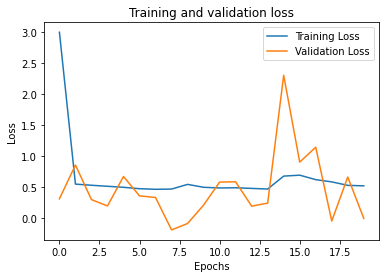

In [22]:
#plot the training and validation accuracy and loss at each epoch
print(history1.history.keys())

# plot metrics
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
#plt.plot(history2.history['mse'])
#plt.plot(history2.history['val_loss'])
#plt.plot(history.history['val_mse'])
#plt.plot(history.history['val_mae'])

plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

___

## 8. Tune using Grid Search Hyperparameters

#### Tune Batch Size and Number of Epochs

In [27]:
batch_size = [10, 15]
epochs = [10, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro


2022-03-05 13:41:43.190424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:41:43.190561: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-05 13:41:43.253464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:41:43.253613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro


2022-03-05 13:41:43.676929: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:41:43.677348: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:41:43.680020: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:41:43.680239: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:41:43.687553: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:41:43.687728: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:41:43.696592: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13

Epoch 1/30
592/592 - 20s - loss: 7.2876 - accuracy: 0.5214
Epoch 1/10
592/592 - 20s - loss: 4.6410 - accuracy: 0.6466
Epoch 1/10
592/592 - 21s - loss: 0.3319 - accuracy: 0.9785
Epoch 1/10
592/592 - 21s - loss: 7.2965 - accuracy: 0.5215
Epoch 1/30
888/888 - 26s - loss: 7.3507 - accuracy: 0.5178
Epoch 1/10
888/888 - 26s - loss: 0.3452 - accuracy: 0.9770
Epoch 1/30
888/888 - 26s - loss: 1.6369 - accuracy: 0.7054
Epoch 1/10
888/888 - 26s - loss: 7.2965 - accuracy: 0.5215
Epoch 1/30
888/888 - 26s - loss: 12.5209 - accuracy: 0.1750
Epoch 1/10
888/888 - 27s - loss: 2.9717 - accuracy: 0.6701
Epoch 2/30
592/592 - 12s - loss: 7.2965 - accuracy: 0.5215
Epoch 2/10
592/592 - 12s - loss: 3.9189 - accuracy: 0.7058
Epoch 2/10
592/592 - 12s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/10
592/592 - 12s - loss: 7.2965 - accuracy: 0.5215
Epoch 2/30
888/888 - 18s - loss: 7.3070 - accuracy: 0.5207
Epoch 3/30
592/592 - 12s - loss: 7.2965 - accuracy: 0.5215
Epoch 2/30
888/888 - 18s - loss: 1.1643 - accuracy: 0.7

2022-03-05 13:43:48.657080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:43:48.838988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 10/10
592/592 - 11s - loss: 7.2965 - accuracy: 0.5215


2022-03-05 13:43:49.133623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


296/296 - 4s - loss: 15.4250 - accuracy: 0.0000e+00
296/296 - 4s - loss: 14.5784 - accuracy: 0.0430
296/296 - 4s - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 7/30
888/888 - 17s - loss: 7.2999 - accuracy: 0.5213
Epoch 7/10
888/888 - 17s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:43:53.311018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:43:53.548353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/30
888/888 - 17s - loss: 0.5333 - accuracy: 0.7659
Epoch 7/10
888/888 - 16s - loss: 0.5355 - accuracy: 0.7678
Epoch 7/10
888/888 - 16s - loss: 7.2965 - accuracy: 0.5215
Epoch 7/30
888/888 - 17s - loss: 0.3319 - accuracy: 0.9785
Epoch 11/30
592/592 - 10s - loss: 7.2965 - accuracy: 0.5215
Epoch 1/30
592/592 - 11s - loss: 0.3340 - accuracy: 0.9781
Epoch 1/30
592/592 - 11s - loss: 7.7111 - accuracy: 0.5000
Epoch 8/30
888/888 - 16s - loss: 7.2999 - accuracy: 0.5213
Epoch 12/30
592/592 - 11s - loss: 7.2965 - accuracy: 0.5215
Epoch 8/10
888/888 - 16s - loss: 0.3319 - accuracy: 0.9785
Epoch 8/30
888/888 - 16s - loss: 0.5183 - accuracy: 0.7677
Epoch 8/10
888/888 - 16s - loss: 7.2965 - accuracy: 0.5215
Epoch 8/10
888/888 - 16s - loss: 0.5546 - accuracy: 0.7683
Epoch 8/30
888/888 - 16s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/30
592/592 - 10s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/30
592/592 - 10s - loss: 7.7125 - accuracy: 0.5000
Epoch 13/30
592/592 - 10s - loss: 7.2965 - accuracy: 0

2022-03-05 13:44:40.507897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 15/30
592/592 - 11s - loss: 7.2965 - accuracy: 0.5215
Epoch 10/30
888/888 - 16s - loss: 7.2999 - accuracy: 0.5213
Epoch 10/10
888/888 - 16s - loss: 0.6772 - accuracy: 0.7251
Epoch 10/30
888/888 - 16s - loss: 0.5027 - accuracy: 0.7714
Epoch 10/10
888/888 - 16s - loss: 7.2965 - accuracy: 0.5215
Epoch 10/30
888/888 - 16s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:44:41.562635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:44:41.754015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/30
592/592 - 10s - loss: 7.7125 - accuracy: 0.5000
Epoch 5/30
592/592 - 10s - loss: 0.3319 - accuracy: 0.9785
444/444 - 5s - loss: 15.4250 - accuracy: 0.0000e+00
444/444 - 5s - loss: 0.6338 - accuracy: 0.8382
444/444 - 5s - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 16/30
592/592 - 8s - loss: 7.2965 - accuracy: 0.5215
Epoch 6/30
592/592 - 7s - loss: 7.7125 - accuracy: 0.5000
Epoch 11/30
888/888 - 12s - loss: 7.2999 - accuracy: 0.5213
Epoch 6/30
592/592 - 8s - loss: 0.3319 - accuracy: 0.9785
Epoch 11/30
888/888 - 12s - loss: 0.5037 - accuracy: 0.7758
Epoch 11/30
888/888 - 12s - loss: 0.3319 - accuracy: 0.9785
Epoch 17/30
592/592 - 7s - loss: 7.2965 - accuracy: 0.5215
Epoch 7/30
592/592 - 7s - loss: 7.7125 - accuracy: 0.5000
Epoch 7/30
592/592 - 7s - loss: 0.3319 - accuracy: 0.9785
Epoch 12/30
888/888 - 10s - loss: 7.2999 - accuracy: 0.5213
Epoch 18/30
592/592 - 7s - loss: 7.2965 - accuracy: 0.5215
Epoch 12/30
888/888 - 11s - loss: 0.5052 - accuracy: 0.7716
Epoch 12/30
888/888 - 

2022-03-05 13:46:29.403400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


296/296 - 3s - loss: 15.2464 - accuracy: 0.0000e+00
Epoch 20/30
592/592 - 7s - loss: 7.7125 - accuracy: 0.5000
Epoch 20/30
592/592 - 7s - loss: 0.3319 - accuracy: 0.9785
Epoch 21/30
888/888 - 9s - loss: 7.2999 - accuracy: 0.5213
Epoch 21/30
888/888 - 9s - loss: 0.4859 - accuracy: 0.7850
Epoch 21/30
888/888 - 9s - loss: 0.3319 - accuracy: 0.9785
Epoch 21/30
592/592 - 6s - loss: 7.7125 - accuracy: 0.5000
Epoch 21/30
592/592 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 22/30
592/592 - 6s - loss: 7.7125 - accuracy: 0.5000
Epoch 22/30
592/592 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 22/30
888/888 - 9s - loss: 7.2999 - accuracy: 0.5213
Epoch 22/30
888/888 - 9s - loss: 0.4868 - accuracy: 0.7812
Epoch 22/30
888/888 - 9s - loss: 0.3319 - accuracy: 0.9785
Epoch 23/30
592/592 - 6s - loss: 7.7125 - accuracy: 0.5000
Epoch 23/30
592/592 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 23/30
888/888 - 9s - loss: 7.2999 - accuracy: 0.5213
Epoch 23/30
888/888 - 9s - loss: 0.5174 - accuracy: 0.7730
Epoc

2022-03-05 13:47:33.511175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:47:33.630680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


296/296 - 2s - loss: 0.6638 - accuracy: 0.9570
296/296 - 2s - loss: 15.4250 - accuracy: 0.0000e+00
Epoch 28/30
888/888 - 7s - loss: 7.2999 - accuracy: 0.5213
Epoch 28/30
888/888 - 7s - loss: 0.4910 - accuracy: 0.7772
Epoch 28/30
888/888 - 7s - loss: 0.3319 - accuracy: 0.9785
Epoch 29/30
888/888 - 6s - loss: 7.2999 - accuracy: 0.5213
Epoch 29/30
888/888 - 6s - loss: 0.4842 - accuracy: 0.7885
Epoch 29/30
888/888 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 30/30
888/888 - 6s - loss: 7.2999 - accuracy: 0.5213


2022-03-05 13:47:50.197887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 30/30
888/888 - 6s - loss: 0.4913 - accuracy: 0.7877
Epoch 30/30
888/888 - 6s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:47:50.789324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:47:50.959357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


444/444 - 2s - loss: 15.2492 - accuracy: 0.0000e+00
444/444 - 2s - loss: 0.5457 - accuracy: 0.7911
444/444 - 2s - loss: 15.3846 - accuracy: 0.0000e+00
Epoch 1/30


2022-03-05 13:47:52.790600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


888/888 - 5s - loss: 9.9474 - accuracy: 0.3477
Epoch 2/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 3/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 4/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 5/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 6/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 7/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 8/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 9/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 10/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 11/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 12/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 13/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 14/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 15/30
888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 16/30

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

888/888 - 4s - loss: 9.9474 - accuracy: 0.3477
Epoch 17/30
888/888 - 4s - l

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.318988 using {'batch_size': 15, 'epochs': 30}
0.279405 (0.395139) with: {'batch_size': 10, 'epochs': 10}
0.263707 (0.372939) with: {'batch_size': 10, 'epochs': 30}
0.014346 (0.020288) with: {'batch_size': 15, 'epochs': 10}
0.318988 (0.451117) with: {'batch_size': 15, 'epochs': 30}


#### Tune the Training Optimization Algorithm

In [29]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2022-03-05 13:49:48.368190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:49:48.404912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:49:48.437532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:49:48.798108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:49:48.869954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:49:48.891055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
278/278 - 4s - loss: 7.7125 - accuracy: 0.5000
Epoch 1/20
278/278 - 4s - loss: 0.4336 - accuracy: 0.9717
Epoch 1/20
278/278 - 4s - loss: 7.3219 - accuracy: 0.5186
Epoch 1/20
278/278 - 5s - loss: 5.8319 - accuracy: 0.6137
Epoch 1/20
278/278 - 5s - loss: 6.1374 - accuracy: 0.5911
Epoch 1/20
278/278 - 5s - loss: 5.1195 - accuracy: 0.6365
Epoch 2/20
278/278 - 3s - loss: 7.7125 - accuracy: 0.5000
Epoch 2/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 3s - loss: 7.2965 - accuracy: 0.5215
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro


2022-03-05 13:49:57.118865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:49:57.119032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-05 13:49:57.119080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:49:57.119210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 2/20
278/278 - 4s - loss: 0.3287 - accuracy: 0.9786
Epoch 2/20
278/278 - 4s - loss: 4.8375 - accuracy: 0.6630
Epoch 2/20
278/278 - 4s - loss: 2.1868 - accuracy: 0.7068
Epoch 3/20
278/278 - 3s - loss: 7.7125 - accuracy: 0.5000
Epoch 3/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:49:58.338903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:49:58.339085: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:49:58.384588: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:49:58.384775: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-05 13:49:58.385354: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:49:58.385480: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 3/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
Epoch 4/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 3s - loss: 7.7125 - accuracy: 0.5000
Epoch 3/20
278/278 - 4s - loss: 0.3284 - accuracy: 0.9787
Epoch 3/20
278/278 - 4s - loss: 3.9070 - accuracy: 0.7182
Epoch 3/20
278/278 - 4s - loss: 0.9832 - accuracy: 0.7296
Epoch 4/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
Epoch 5/20
278/278 - 3s - loss: 7.7125 - accuracy: 0.5000
Epoch 5/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 4s - loss: 0.3284 - accuracy: 0.9787
Epoch 5/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
Epoch 4/20
278/278 - 4s - loss: 2.9907 - accuracy: 0.7313
Epoch 4/20
278/278 - 4s - loss: 0.6805 - accuracy: 0.7614
Epoch 6/20
278/278 - 3s - loss: 7.7125 - accuracy: 0.5000
Epoch 6/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785
Epoch 6/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215


2022-03-05 13:50:09.606355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:50:09.832679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:50:09.847883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/20
278/278 - 4s - loss: 0.3284 - accuracy: 0.9787
Epoch 5/20
278/278 - 5s - loss: 2.0216 - accuracy: 0.7444
Epoch 5/20
278/278 - 5s - loss: 0.6130 - accuracy: 0.7658
Epoch 7/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 7/20
278/278 - 4s - loss: 7.7125 - accuracy: 0.5000
Epoch 7/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 1/20
278/278 - 17s - loss: 0.3339 - accuracy: 0.9783
Epoch 1/20
278/278 - 17s - loss: 1.1845 - accuracy: 0.7160
Epoch 1/20
278/278 - 17s - loss: 7.1375 - accuracy: 0.5224
Epoch 6/20
278/278 - 6s - loss: 0.3284 - accuracy: 0.9787
Epoch 6/20
278/278 - 6s - loss: 1.5545 - accuracy: 0.7281
Epoch 8/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 8/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000
Epoch 6/20
278/278 - 6s - loss: 0.6190 - accuracy: 0.7713
Epoch 8/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.6298 - accuracy: 0.7506
Epoch 2/20


2022-03-05 13:51:16.894026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:51:17.007352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 16/20
278/278 - 6s - loss: 0.3284 - accuracy: 0.9787
Epoch 16/20
278/278 - 6s - loss: 0.6260 - accuracy: 0.7621
Epoch 16/20
278/278 - 6s - loss: 0.5307 - accuracy: 0.7855
139/139 - 2s - loss: 0.6638 - accuracy: 0.9570
139/139 - 2s - loss: 15.4249 - accuracy: 0.0000e+00
Epoch 20/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215


2022-03-05 13:51:20.079048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 14/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 14/20
278/278 - 4s - loss: 0.5376 - accuracy: 0.7565
Epoch 14/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
139/139 - 2s - loss: 15.2493 - accuracy: 0.0000e+00
Epoch 17/20
278/278 - 5s - loss: 0.3284 - accuracy: 0.9787
Epoch 17/20
278/278 - 5s - loss: 0.6544 - accuracy: 0.7699
Epoch 17/20
278/278 - 5s - loss: 0.5708 - accuracy: 0.7790
Epoch 15/20
278/278 - 4s - loss: 0.5341 - accuracy: 0.7677
Epoch 15/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
Epoch 15/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 4s - loss: 0.3284 - accuracy: 0.9787
Epoch 18/20
278/278 - 4s - loss: 0.6091 - accuracy: 0.7753
Epoch 18/20
278/278 - 4s - loss: 0.5840 - accuracy: 0.7823
Epoch 16/20
278/278 - 4s - loss: 1.2914 - accuracy: 0.6805
Epoch 16/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 16/20
278/278 - 4s - loss: 7.2965 - accuracy: 0.5215
Epoch 19/20
278/278 - 4s - loss: 0.3284 - accuracy: 0.9787
Epoc

2022-03-05 13:51:34.753323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 18/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 20/20
278/278 - 4s - loss: 0.8098 - accuracy: 0.7775


2022-03-05 13:51:35.102190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 0.5919 - accuracy: 0.7848


2022-03-05 13:51:35.446364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 15.3287 - accuracy: 0.0059
139/139 - 1s - loss: 0.4121 - accuracy: 0.8975
139/139 - 1s - loss: 0.6762 - accuracy: 0.7972
Epoch 19/20
278/278 - 2s - loss: 7.2965 - accuracy: 0.5215
Epoch 19/20
278/278 - 2s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 2s - loss: 0.5787 - accuracy: 0.7358
Epoch 20/20
278/278 - 2s - loss: 7.2965 - accuracy: 0.5215
Epoch 20/20
278/278 - 2s - loss: 0.3319 - accuracy: 0.9785
Epoch 20/20
278/278 - 2s - loss: 0.5422 - accuracy: 0.7651


2022-03-05 13:51:38.994070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:51:39.011790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:51:39.013485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 15.2493 - accuracy: 0.0000e+00
139/139 - 1s - loss: 15.4192 - accuracy: 0.0000e+00
139/139 - 1s - loss: 0.5586 - accuracy: 0.8267
Epoch 1/20


2022-03-05 13:51:40.187415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 - 3s - loss: 9.9474 - accuracy: 0.3477
Epoch 2/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 3/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 4/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 5/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 6/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 7/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 8/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 9/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 10/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 11/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 12/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 13/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 14/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 15/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 16/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 17/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 18/20
417/4

In [30]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.566847 using {'optimizer': 'RMSprop'}
0.318988 (0.451117) with: {'optimizer': 'SGD'}
0.566847 (0.398785) with: {'optimizer': 'RMSprop'}
0.275575 (0.389721) with: {'optimizer': 'Adam'}


#### Tune Learning Rate and Momentum

In [31]:
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.2]
momentum = [0.0, 0.1, 0.2]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2022-03-05 13:52:28.492803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.523695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.527205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.534188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.547417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.563782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:52:28.569964: I tensorflow/core/grappler/optimizers/cust

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1 Pro


2022-03-05 13:52:30.878074: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 13:52:30.878217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-05 13:52:31.601958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 13:52:31.602148: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 1/20
278/278 - 5s - loss: 0.3365 - accuracy: 0.9777
Epoch 1/20
278/278 - 5s - loss: 7.3844 - accuracy: 0.4967
Epoch 1/20
278/278 - 5s - loss: 4.0417 - accuracy: 0.7286
Epoch 1/20
278/278 - 5s - loss: 2.8160 - accuracy: 0.5700
Epoch 1/20
278/278 - 6s - loss: 3.8550 - accuracy: 0.6219
Epoch 1/20
278/278 - 5s - loss: 0.5086 - accuracy: 0.9642
Epoch 1/20
278/278 - 6s - loss: 2.5531 - accuracy: 0.6062
Epoch 1/20
278/278 - 6s - loss: 1.4111 - accuracy: 0.6656
Epoch 2/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.7791 - accuracy: 0.6782
Epoch 2/20
278/278 - 5s - loss: 2.3188 - accuracy: 0.6922
Epoch 2/20
278/278 - 5s - loss: 0.3337 - accuracy: 0.9784
Epoch 2/20
278/278 - 5s - loss: 5.8156 - accuracy: 0.5231
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.5731 - accuracy: 0.7412
Epoch 2/20
278

2022-03-05 13:52:47.648762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/20
278/278 - 5s - loss: 0.9901 - accuracy: 0.7099
Epoch 4/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 5s - loss: 0.5518 - accuracy: 0.7548
Epoch 4/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 5s - loss: 5.8245 - accuracy: 0.6041
Epoch 4/20
278/278 - 5s - loss: 0.5163 - accuracy: 0.7619
Epoch 4/20
278/278 - 5s - loss: 0.5311 - accuracy: 0.7589
Epoch 5/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 1/20
278/278 - 21s - loss: 3.8001 - accuracy: 0.5924
Epoch 5/20
278/278 - 5s - loss: 0.6976 - accuracy: 0.7370
Epoch 5/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 6s - loss: 0.6584 - accuracy: 0.7427
Epoch 5/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 5s - loss: 0.4950 - accuracy: 0.7653
Epoch 5/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 6s - loss: 4.8855 - accuracy: 0.6589
Epoch 5/20
27

Epoch 18/20
278/278 - 5s - loss: 0.7993 - accuracy: 0.6384
Epoch 18/20
278/278 - 5s - loss: 0.5181 - accuracy: 0.7743
Epoch 18/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 18/20
278/278 - 5s - loss: 0.4883 - accuracy: 0.7697
Epoch 18/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 6s - loss: 3.7848 - accuracy: 0.7224
Epoch 15/20
278/278 - 5s - loss: 0.5235 - accuracy: 0.7604
Epoch 19/20
278/278 - 5s - loss: 0.4856 - accuracy: 0.7767
Epoch 19/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 5s - loss: 0.5174 - accuracy: 0.7757
Epoch 19/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 19/20
278/278 - 6s - loss: 0.5640 - accuracy: 0.7326
Epoch 19/20
278/278 - 5s - loss: 0.4813 - accuracy: 0.7687
Epoch 19/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 6s - loss: 6.4787 - accuracy: 0.56

2022-03-05 13:54:15.239182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:15.345268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.5043 - accuracy: 0.7786
Epoch 20/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 20/20
278/278 - 5s - loss: 0.5306 - accuracy: 0.7740


2022-03-05 13:54:15.694315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:15.703837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:15.821187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.4751 - accuracy: 0.7725


2022-03-05 13:54:16.004911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:54:16.275625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:16.337099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
139/139 - 2s - loss: 0.5043 - accuracy: 0.8346
139/139 - 2s - loss: 15.4015 - accuracy: 0.0011


2022-03-05 13:54:16.902686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 0.4832 - accuracy: 0.8574
139/139 - 2s - loss: 0.0000e+00 - accuracy: 1.0000
139/139 - 1s - loss: 0.4802 - accuracy: 0.8565
139/139 - 1s - loss: 0.5035 - accuracy: 0.7704
139/139 - 1s - loss: 15.4217 - accuracy: 0.0000e+00
139/139 - 1s - loss: 15.4215 - accuracy: 2.2533e-04
139/139 - 1s - loss: 14.5930 - accuracy: 0.0430
Epoch 17/20
278/278 - 3s - loss: 0.5155 - accuracy: 0.7720


2022-03-05 13:54:17.749894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:17.773892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:17.932737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:17.965007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:18.020202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:18.114231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:54:18.311966: I tensorflow/core/grappler/optimizers/cust

Epoch 18/20
278/278 - 5s - loss: 0.5769 - accuracy: 0.7537
Epoch 1/20
278/278 - 6s - loss: 1.3408 - accuracy: 0.6630
Epoch 1/20
278/278 - 6s - loss: 0.4775 - accuracy: 0.9673
Epoch 1/20
278/278 - 6s - loss: 6.0345 - accuracy: 0.5525
Epoch 1/20
278/278 - 6s - loss: 8.0444 - accuracy: 0.4785
Epoch 1/20
278/278 - 6s - loss: 0.4174 - accuracy: 0.9687
Epoch 1/20
278/278 - 6s - loss: 5.3618 - accuracy: 0.5922
Epoch 1/20
278/278 - 6s - loss: 0.3308 - accuracy: 0.9784
Epoch 1/20
278/278 - 6s - loss: 2.5866 - accuracy: 0.5792
Epoch 1/20
278/278 - 6s - loss: 0.9666 - accuracy: 0.6996
Epoch 19/20
278/278 - 6s - loss: 0.6601 - accuracy: 0.6924
Epoch 2/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788
Epoch 2/20
278/278 - 6s - loss: 0.5549 - accuracy: 0.7675
Epoch 2/20
278/278 - 5s - loss: 1.5906 - accuracy: 0.6478
Epoch 2/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 2/20
278/278 - 5s - loss: 4.1031 - accuracy: 0.6797
Epoch 2/20
278/278 - 6s - loss: 0.3270 - accuracy: 0.9787
Epoch 2/20
2

2022-03-05 13:54:34.029888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/20
278/278 - 5s - loss: 3.9452 - accuracy: 0.6977
Epoch 3/20
278/278 - 5s - loss: 0.3275 - accuracy: 0.9785
Epoch 3/20
278/278 - 6s - loss: 8.0444 - accuracy: 0.4785
Epoch 3/20
278/278 - 5s - loss: 0.5174 - accuracy: 0.7623
Epoch 3/20
278/278 - 5s - loss: 1.9178 - accuracy: 0.6714
Epoch 3/20
278/278 - 6s - loss: 0.3302 - accuracy: 0.9786
139/139 - 2s - loss: 0.7972 - accuracy: 0.7832


2022-03-05 13:54:37.138905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/20
278/278 - 5s - loss: 0.5226 - accuracy: 0.7697
Epoch 4/20
278/278 - 5s - loss: 0.6257 - accuracy: 0.6817
Epoch 4/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788
Epoch 4/20
278/278 - 5s - loss: 3.9983 - accuracy: 0.7096
Epoch 4/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 4/20
278/278 - 5s - loss: 0.5043 - accuracy: 0.7696
Epoch 4/20
278/278 - 5s - loss: 0.7906 - accuracy: 0.7393
Epoch 4/20
278/278 - 5s - loss: 0.3302 - accuracy: 0.9786
Epoch 1/20
278/278 - 6s - loss: 7.4403 - accuracy: 0.4860
Epoch 5/20
278/278 - 6s - loss: 0.5049 - accuracy: 0.7758
Epoch 5/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788
Epoch 5/20
278/278 - 6s - loss: 0.5748 - accuracy: 0.7070
Epoch 5/20
278/278 - 6s - loss: 3.7921 - accuracy: 0.7216
Epoch 5/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 5/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 5s - loss: 0.6376 - accuracy: 0.7534
Epoch 5/20
278

Epoch 18/20
278/278 - 6s - loss: 0.5471 - accuracy: 0.7565
Epoch 18/20
278/278 - 5s - loss: 0.5162 - accuracy: 0.7756
Epoch 18/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 6s - loss: 0.5264 - accuracy: 0.7511
Epoch 18/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788
Epoch 18/20
278/278 - 6s - loss: 0.9155 - accuracy: 0.7121
Epoch 18/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 18/20
278/278 - 5s - loss: 1.5077 - accuracy: 0.6734
Epoch 18/20
278/278 - 6s - loss: 0.3302 - accuracy: 0.9786
Epoch 15/20
278/278 - 5s - loss: 0.5525 - accuracy: 0.7677
Epoch 19/20
278/278 - 5s - loss: 0.5120 - accuracy: 0.7753
Epoch 19/20
278/278 - 5s - loss: 0.5475 - accuracy: 0.7600
Epoch 19/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788
Epoch 19/20
278/278 - 6s - loss: 0.5463 - accuracy: 0.7416
Epoch 19/20
278/278 - 5s - loss: 0.5993 - accuracy: 0.7437
Epoch 19/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.47

2022-03-05 13:56:05.563400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 6s - loss: 0.5362 - accuracy: 0.7590


2022-03-05 13:56:05.824520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:56:06.858475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.3267 - accuracy: 0.9788


2022-03-05 13:56:07.155513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 0.5333 - accuracy: 0.8245
Epoch 20/20
278/278 - 5s - loss: 0.5179 - accuracy: 0.7582
Epoch 20/20
278/278 - 5s - loss: 0.5696 - accuracy: 0.7537


2022-03-05 13:56:07.538573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 0.5087 - accuracy: 0.8258
Epoch 20/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 20/20
278/278 - 5s - loss: 0.5449 - accuracy: 0.7566


2022-03-05 13:56:07.869026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:08.104029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:08.172312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 15.4151 - accuracy: 2.2533e-04
Epoch 17/20
278/278 - 4s - loss: 0.5310 - accuracy: 0.7687
139/139 - 2s - loss: 15.3302 - accuracy: 0.0050
Epoch 20/20
278/278 - 5s - loss: 0.3302 - accuracy: 0.9786
139/139 - 1s - loss: 0.6279 - accuracy: 0.7492


2022-03-05 13:56:08.933138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:08.984555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 0.7371 - accuracy: 0.8317
139/139 - 1s - loss: 0.0000e+00 - accuracy: 1.0000
139/139 - 1s - loss: 0.5257 - accuracy: 0.8522


2022-03-05 13:56:09.245037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:09.528846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:09.746908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:09.938539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 15.3165 - accuracy: 0.0061


2022-03-05 13:56:10.017756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:56:10.153014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 18/20
278/278 - 3s - loss: 3.7170 - accuracy: 0.5771
Epoch 1/20
278/278 - 5s - loss: 1.1353 - accuracy: 0.9134
Epoch 1/20
278/278 - 5s - loss: 2.2264 - accuracy: 0.6916
Epoch 1/20
278/278 - 5s - loss: 5.1606 - accuracy: 0.6317
Epoch 1/20
278/278 - 5s - loss: 0.3426 - accuracy: 0.9754
Epoch 1/20
278/278 - 5s - loss: 4.8394 - accuracy: 0.6394
Epoch 1/20
278/278 - 5s - loss: 1.8989 - accuracy: 0.6504
Epoch 1/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 19/20
278/278 - 4s - loss: 0.6553 - accuracy: 0.6078
Epoch 2/20
278/278 - 4s - loss: 0.3320 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.6012 - accuracy: 0.7491
Epoch 2/20
278/278 - 4s - loss: 4.6713 - accuracy: 0.6707
Epoch 2/20
278/278 - 4s - loss: 5.0580 - accuracy: 0.6430
Epoch 2/20
278/278 - 5s - loss: 0.3118 - accuracy: 0.9792
Epoch 2/20
278/278 - 4s - loss: 1.1091 - accuracy: 0.6894
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 20/20
278/278 - 4s - loss: 0.6113 - accuracy: 0.6528


2022-03-05 13:56:20.721161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 3/20
278/278 - 4s - loss: 0.5808 - accuracy: 0.7534
139/139 - 2s - loss: 0.5854 - accuracy: 0.7569
Epoch 3/20
278/278 - 4s - loss: 4.5981 - accuracy: 0.6816
Epoch 3/20
278/278 - 4s - loss: 0.3197 - accuracy: 0.9793
Epoch 3/20
278/278 - 4s - loss: 3.9449 - accuracy: 0.7079
Epoch 3/20
278/278 - 4s - loss: 0.7062 - accuracy: 0.7240
Epoch 3/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 4/20
278/278 - 4s - loss: 4.4200 - accuracy: 0.6919
Epoch 4/20
278/278 - 4s - loss: 0.5413 - accuracy: 0.7569
Epoch 4/20
278/278 - 4s - loss: 0.3166 - accuracy: 0.9793
Epoch 4/20
278/278 - 4s - loss: 3.8507 - accuracy: 0.7016
Epoch 4/20
278/278 - 4s - loss: 2.6683 - accuracy: 0.6359
Epoch 4/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785
Epoch 5/20
278/278 - 4s - loss: 5.2329 - accuracy: 0.6420
Epoch 5/20
278/278 - 4s -

2022-03-05 13:57:27.608829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:57:27.619655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 7.6246 - accuracy: 0.5000


2022-03-05 13:57:28.187965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 0.5631 - accuracy: 0.7392
139/139 - 1s - loss: 13.4663 - accuracy: 0.0448


2022-03-05 13:57:28.686912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 15.4216 - accuracy: 2.2533e-04
Epoch 20/20
278/278 - 4s - loss: 0.5300 - accuracy: 0.7686


2022-03-05 13:57:28.964719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 3s - loss: 0.3319 - accuracy: 0.9785
139/139 - 1s - loss: 14.5930 - accuracy: 0.0430
Epoch 20/20
278/278 - 3s - loss: 0.5226 - accuracy: 0.7695


2022-03-05 13:57:29.266117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:57:29.338405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 0.5341 - accuracy: 0.8711
139/139 - 1s - loss: 0.5566 - accuracy: 0.8218
139/139 - 1s - loss: 15.4249 - accuracy: 0.0000e+00
139/139 - 1s - loss: 0.5269 - accuracy: 0.8558
Epoch 1/20


2022-03-05 13:57:30.263183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 2/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 3/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 4/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 5/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 6/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 7/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 8/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 9/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 10/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 11/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 12/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 13/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 14/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 15/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 16/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 17/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 18/20
417/4

In [32]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.609809 using {'learn_rate': 0.1, 'momentum': 0.0}
0.275424 (0.359506) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.564068 (0.398805) with: {'learn_rate': 0.01, 'momentum': 0.1}
0.542662 (0.384532) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.609809 (0.433657) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.608683 (0.436081) with: {'learn_rate': 0.1, 'momentum': 0.1}
0.535827 (0.376937) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.529593 (0.375563) with: {'learn_rate': 0.2, 'momentum': 0.0}
0.314556 (0.382712) with: {'learn_rate': 0.2, 'momentum': 0.1}
0.564293 (0.399524) with: {'learn_rate': 0.2, 'momentum': 0.2}


#### Tune Network Weight Initialization

In [33]:
# define the grid search parameters
init_mode = ['uniform', 'normal', 'zero']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2022-03-05 13:58:06.835438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.853796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.854712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.860913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.862330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.864238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:58:06.872062: I tensorflow/core/grappler/optimizers/cust

Epoch 1/20
278/278 - 5s - loss: 5.3322 - accuracy: 0.6070
Epoch 1/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000
Epoch 1/20
278/278 - 5s - loss: 4.2411 - accuracy: 0.5412
Epoch 1/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 1/20
278/278 - 5s - loss: 0.3981 - accuracy: 0.9617
Epoch 1/20
278/278 - 5s - loss: 1.0670 - accuracy: 0.6985
Epoch 1/20
278/278 - 5s - loss: 1.0513 - accuracy: 0.9273
Epoch 1/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 1/20
278/278 - 5s - loss: 7.6198 - accuracy: 0.5002
Epoch 2/20
278/278 - 5s - loss: 0.3269 - accuracy: 0.9787
Epoch 2/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000
Epoch 2/20
278/278 - 5s - loss: 6.3928 - accuracy: 0.5513
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 3.0718 - accuracy: 0.6534
Epoch 2/20
278/278 - 5s - loss: 0.6450 - accuracy: 0.7523
Epoch 2/20
278/278 - 5s - loss: 0.3367 - accuracy: 0.9777
Epoch 2/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 2/20
278

Epoch 16/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 16/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 17/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 17/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000
Epoch 17/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 17/20
278/278 - 5s - loss: 7.3019 - accuracy: 0.5211
Epoch 17/20
278/278 - 5s - loss: 0.4910 - accuracy: 0.7731
Epoch 17/20
278/278 - 5s - loss: 0.5653 - accuracy: 0.7595
Epoch 17/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 17/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 17/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000
Epoch 18/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 5s - loss: 0.4851 - accuracy: 0.7726
Epoch 18/20
278/278 - 5s - loss: 7.3019 - accuracy: 0.5211
Epoch 18/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.50

2022-03-05 13:59:43.852630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 7.7125 - accuracy: 0.5000


2022-03-05 13:59:44.739099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:59:44.938879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 20/20
278/278 - 5s - loss: 0.5010 - accuracy: 0.7696
Epoch 20/20
278/278 - 5s - loss: 7.3020 - accuracy: 0.5211
139/139 - 2s - loss: 15.4073 - accuracy: 0.0000e+00
Epoch 20/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000


2022-03-05 13:59:45.440456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:59:45.466658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:59:45.624019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 7.5174 - accuracy: 0.5018
Epoch 20/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 20/20
278/278 - 4s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 13:59:45.663803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:59:45.782247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 13:59:45.849093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 0.6638 - accuracy: 0.9570
139/139 - 1s - loss: 15.2644 - accuracy: 0.0092
139/139 - 1s - loss: 0.5594 - accuracy: 0.7828
139/139 - 1s - loss: 15.2466 - accuracy: 0.0000e+00
139/139 - 1s - loss: 14.5930 - accuracy: 0.0430
139/139 - 1s - loss: 14.5930 - accuracy: 0.0430
139/139 - 1s - loss: 0.0000e+00 - accuracy: 1.0000
139/139 - 1s - loss: 15.4249 - accuracy: 0.0000e+00
Epoch 1/20


2022-03-05 13:59:47.132423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 2/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 3/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 4/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 5/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 6/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 7/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 8/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 9/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 10/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 11/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 12/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 13/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 14/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 15/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 16/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 17/20
417/417 - 2s - loss: 5.3629 - accuracy: 0.6523
Epoch 18/20
417/4

In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.652321 using {'init_mode': 'zero'}
0.014346 (0.020288) with: {'init_mode': 'uniform'}
0.278354 (0.356954) with: {'init_mode': 'normal'}
0.652321 (0.461595) with: {'init_mode': 'zero'}


#### Tune the Neuron Activation Function

In [35]:
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2022-03-05 14:00:38.253310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.265451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.282034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.288662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.291459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.293108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:00:38.293139: I tensorflow/core/grappler/optimizers/cust

Epoch 1/20
278/278 - 6s - loss: 5.2307 - accuracy: 0.5389
Epoch 1/20
278/278 - 6s - loss: 0.6178 - accuracy: 0.6920
Epoch 1/20
278/278 - 6s - loss: 0.6269 - accuracy: 0.6947
Epoch 1/20
278/278 - 6s - loss: 0.1863 - accuracy: 0.9784
Epoch 1/20
278/278 - 6s - loss: 7.6336 - accuracy: 0.4988
Epoch 1/20
278/278 - 6s - loss: 6.9598 - accuracy: 0.5428
Epoch 1/20
278/278 - 6s - loss: 8.0444 - accuracy: 0.4785
Epoch 1/20
278/278 - 6s - loss: 0.6508 - accuracy: 0.6511
Epoch 1/20
278/278 - 6s - loss: 0.3307 - accuracy: 0.9783
Epoch 1/20
278/278 - 6s - loss: 0.4097 - accuracy: 0.9339
Epoch 2/20
278/278 - 5s - loss: 0.1088 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.5505 - accuracy: 0.7445
Epoch 2/20
278/278 - 5s - loss: 0.5823 - accuracy: 0.7260
Epoch 2/20
278/278 - 5s - loss: 6.4638 - accuracy: 0.5774
Epoch 2/20
278/278 - 5s - loss: 0.5481 - accuracy: 0.7355
Epoch 2/20
278/278 - 5s - loss: 0.5649 - accuracy: 0.7392
Epoch 2/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 2/20
278

Epoch 15/20
278/278 - 5s - loss: 0.4470 - accuracy: 0.7844
Epoch 15/20
278/278 - 5s - loss: 0.4356 - accuracy: 0.7871
Epoch 15/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 15/20
278/278 - 6s - loss: 0.4517 - accuracy: 0.7752
Epoch 15/20
278/278 - 5s - loss: 0.4700 - accuracy: 0.7741
Epoch 15/20
278/278 - 5s - loss: 0.5270 - accuracy: 0.7661
Epoch 15/20
278/278 - 6s - loss: 0.3319 - accuracy: 0.9785
Epoch 15/20
278/278 - 6s - loss: 8.0444 - accuracy: 0.4785
Epoch 16/20
278/278 - 5s - loss: 6.9791 - accuracy: 0.5469
Epoch 16/20
278/278 - 6s - loss: 0.0852 - accuracy: 0.9789
Epoch 16/20
278/278 - 5s - loss: 0.4481 - accuracy: 0.7842
Epoch 16/20
278/278 - 5s - loss: 0.4345 - accuracy: 0.7856
Epoch 16/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 16/20
278/278 - 5s - loss: 0.4547 - accuracy: 0.7749
Epoch 16/20
278/278 - 5s - loss: 0.4657 - accuracy: 0.7740
Epoch 16/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 16/20
278/278 - 6s - loss: 0.5214 - accuracy: 0.77

2022-03-05 14:02:24.053346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 19/20
278/278 - 5s - loss: 8.0444 - accuracy: 0.4785
Epoch 20/20
278/278 - 5s - loss: 0.0828 - accuracy: 0.9787
Epoch 20/20
278/278 - 5s - loss: 0.4400 - accuracy: 0.7875


2022-03-05 14:02:24.987554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:02:25.029082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.4320 - accuracy: 0.7873


2022-03-05 14:02:25.240497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 0.2337 - accuracy: 0.9847
Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 14:02:26.247110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 2.8670 - accuracy: 0.0399
Epoch 20/20
278/278 - 5s - loss: 0.4475 - accuracy: 0.7746
139/139 - 2s - loss: 0.4256 - accuracy: 0.8139


2022-03-05 14:02:26.731374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:02:26.801495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 2s - loss: 0.3577 - accuracy: 0.8779
Epoch 20/20
278/278 - 5s - loss: 0.4546 - accuracy: 0.7799


2022-03-05 14:02:27.000906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 14:02:27.294942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:02:27.396531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 0.5127 - accuracy: 0.7701
139/139 - 1s - loss: 15.4215 - accuracy: 2.2533e-04


2022-03-05 14:02:27.549208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 0.5194 - accuracy: 0.8319
139/139 - 1s - loss: 0.4211 - accuracy: 0.7954
Epoch 20/20
278/278 - 4s - loss: 8.0444 - accuracy: 0.4785
139/139 - 1s - loss: 15.4220 - accuracy: 0.0000e+00


2022-03-05 14:02:28.314245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 0.5157 - accuracy: 0.8328
139/139 - 1s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1/20
278/278 - 3s - loss: 7.1782 - accuracy: 0.5311
Epoch 1/20
278/278 - 3s - loss: 14.9194 - accuracy: 0.0216
Epoch 2/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 2/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 3/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 3/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 4/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 4/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 5/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 5/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 6/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 6/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 7/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 7/20
278/278 - 1s - loss: 14.9194 - accuracy: 0.0216
Epoch 8/20
278/278 - 1s - loss: 7.6246 - accuracy: 0.5000
Epoch 8/20
278/278 - 1s -

2022-03-05 14:02:55.277396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:02:55.473316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 0s - loss: 14.5930 - accuracy: 0.0430
139/139 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1/20


2022-03-05 14:02:56.226869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 - 2s - loss: 4.7388 - accuracy: 0.6915
Epoch 2/20
417/417 - 2s - loss: 5.0438 - accuracy: 0.6686
Epoch 3/20
417/417 - 2s - loss: 4.6240 - accuracy: 0.6972
Epoch 4/20
417/417 - 2s - loss: 4.7068 - accuracy: 0.6934
Epoch 5/20
417/417 - 2s - loss: 5.1382 - accuracy: 0.6668
Epoch 6/20
417/417 - 2s - loss: 4.9293 - accuracy: 0.6784
Epoch 7/20
417/417 - 2s - loss: 4.7887 - accuracy: 0.6877
Epoch 8/20
417/417 - 2s - loss: 4.6728 - accuracy: 0.6966
Epoch 9/20
417/417 - 2s - loss: 4.5858 - accuracy: 0.7014
Epoch 10/20
417/417 - 2s - loss: 4.5059 - accuracy: 0.7068
Epoch 11/20
417/417 - 2s - loss: 4.4779 - accuracy: 0.7076
Epoch 12/20
417/417 - 2s - loss: 4.4735 - accuracy: 0.7089
Epoch 13/20
417/417 - 2s - loss: 4.9149 - accuracy: 0.6779
Epoch 14/20
417/417 - 2s - loss: 4.6781 - accuracy: 0.6959
Epoch 15/20
417/417 - 2s - loss: 4.5182 - accuracy: 0.7050
Epoch 16/20
417/417 - 2s - loss: 5.0702 - accuracy: 0.6709
Epoch 17/20
417/417 - 2s - loss: 5.0651 - accuracy: 0.6714
Epoch 18/20
417/4

In [36]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.675905 using {'activation': 'linear'}
0.610936 (0.437356) with: {'activation': 'relu'}
0.542512 (0.383744) with: {'activation': 'tanh'}
0.577212 (0.380846) with: {'activation': 'sigmoid'}
0.675905 (0.447549) with: {'activation': 'linear'}


#### 2b) Tune the Number of Neurons in the Hidden Layer

In [37]:
# define the grid search parameters
neurons = [5, 10, 15]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2022-03-05 14:03:32.019001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.037342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.037832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.047052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.048814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.061919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:03:32.066555: I tensorflow/core/grappler/optimizers/cust

Epoch 1/20
278/278 - 5s - loss: 0.9573 - accuracy: 0.9318
Epoch 1/20
278/278 - 5s - loss: 0.3497 - accuracy: 0.9771
Epoch 1/20
278/278 - 5s - loss: 7.8085 - accuracy: 0.4659
Epoch 1/20
278/278 - 5s - loss: 0.3290 - accuracy: 0.9786
Epoch 1/20
278/278 - 5s - loss: 2.7988 - accuracy: 0.6336
Epoch 1/20
278/278 - 5s - loss: 5.1611 - accuracy: 0.6336
Epoch 1/20
278/278 - 5s - loss: 7.0762 - accuracy: 0.5246
Epoch 1/20
278/278 - 6s - loss: 7.2987 - accuracy: 0.5211
Epoch 1/20
278/278 - 6s - loss: 7.6264 - accuracy: 0.4998
Epoch 2/20
278/278 - 5s - loss: 7.3403 - accuracy: 0.4743
Epoch 2/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 2/20
278/278 - 5s - loss: 0.3336 - accuracy: 0.9784
Epoch 2/20
278/278 - 5s - loss: 5.5783 - accuracy: 0.6187
Epoch 2/20
278/278 - 5s - loss: 1.8410 - accuracy: 0.6721
Epoch 2/20
278/278 - 5s - loss: 0.3285 - accuracy: 0.9787
Epoch 2/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 2/20
278/278 - 5s - loss: 3.8448 - accuracy: 0.7248
Epoch 2/20
278

Epoch 16/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 17/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 17/20
278/278 - 5s - loss: 2.3735 - accuracy: 0.6530
Epoch 17/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 17/20
278/278 - 5s - loss: 0.3302 - accuracy: 0.9786
Epoch 17/20
278/278 - 5s - loss: 0.3336 - accuracy: 0.9784
Epoch 17/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 17/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 17/20
278/278 - 5s - loss: 0.5464 - accuracy: 0.7588
Epoch 17/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 18/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 18/20
278/278 - 5s - loss: 7.6246 - accuracy: 0.5000
Epoch 18/20
278/278 - 5s - loss: 2.6699 - accuracy: 0.6248
Epoch 18/20
278/278 - 5s - loss: 0.3302 - accuracy: 0.9786
Epoch 18/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785
Epoch 18/20
278/278 - 5s - loss: 0.5679 - accuracy: 0.7634
Epoch 18/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.52

2022-03-05 14:05:09.696390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:05:09.898150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:05:10.086003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 20/20
278/278 - 5s - loss: 0.3302 - accuracy: 0.9786


2022-03-05 14:05:10.394628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 0.6050 - accuracy: 0.7474
Epoch 20/20
278/278 - 5s - loss: 7.2965 - accuracy: 0.5215
Epoch 20/20
278/278 - 5s - loss: 0.3336 - accuracy: 0.9784
Epoch 20/20
278/278 - 5s - loss: 0.3319 - accuracy: 0.9785


2022-03-05 14:05:10.740465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:05:10.805240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-05 14:05:10.805623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 20/20
278/278 - 4s - loss: 7.6246 - accuracy: 0.5000
139/139 - 1s - loss: 0.5022 - accuracy: 0.8179


2022-03-05 14:05:10.978121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 1s - loss: 14.5930 - accuracy: 0.0430
139/139 - 1s - loss: 15.2493 - accuracy: 0.0000e+00
139/139 - 1s - loss: 15.4020 - accuracy: 4.5065e-04
139/139 - 1s - loss: 15.2493 - accuracy: 0.0000e+00
139/139 - 1s - loss: 15.3359 - accuracy: 0.0056
139/139 - 1s - loss: 15.4249 - accuracy: 0.0000e+00
139/139 - 1s - loss: 14.5930 - accuracy: 0.0430


2022-03-05 14:05:54.153313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


139/139 - 0s - loss: 0.6548 - accuracy: 0.8010
Epoch 1/20


2022-03-05 14:05:54.941858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 - 2s - loss: 5.1792 - accuracy: 0.5952
Epoch 2/20
417/417 - 2s - loss: 4.0599 - accuracy: 0.7011
Epoch 3/20
417/417 - 2s - loss: 4.3298 - accuracy: 0.7080
Epoch 4/20
417/417 - 2s - loss: 5.0775 - accuracy: 0.6679
Epoch 5/20
417/417 - 2s - loss: 4.8664 - accuracy: 0.6793
Epoch 6/20
417/417 - 2s - loss: 3.9346 - accuracy: 0.7215
Epoch 7/20
417/417 - 2s - loss: 4.4149 - accuracy: 0.6915
Epoch 8/20
417/417 - 2s - loss: 5.1724 - accuracy: 0.6625
Epoch 9/20
417/417 - 2s - loss: 7.6783 - accuracy: 0.4869
Epoch 10/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 11/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 12/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 13/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 14/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 15/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 16/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 17/20
417/417 - 2s - loss: 9.9474 - accuracy: 0.3477
Epoch 18/20
417/4

In [38]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.281358 using {'neurons': 10}
0.272796 (0.385473) with: {'neurons': 5}
0.281358 (0.367888) with: {'neurons': 10}
0.016224 (0.019099) with: {'neurons': 15}


___

In [39]:
# Print weights

for layer_depth, layer in enumerate(a.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('___________ Layer', layer_depth, '__________')
    for toNeuronNum, bias in enumerate(biases):
        print(f'Bias to Layer{layer_depth+1}Neuron{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'Layer{layer_depth}, Neuron{fromNeuronNum} to Layer{layer_depth+1}, Neuron{toNeuronNum} = {wgt2}')

___________ Layer 0 __________
Bias to Layer1Neuron0: 0.0
Bias to Layer1Neuron1: 0.0
Bias to Layer1Neuron2: 0.0
Bias to Layer1Neuron3: 0.0
Bias to Layer1Neuron4: 0.0
Bias to Layer1Neuron5: 0.0
Bias to Layer1Neuron6: 0.0
Bias to Layer1Neuron7: 0.0
Bias to Layer1Neuron8: 0.0
Bias to Layer1Neuron9: 0.0
Bias to Layer1Neuron10: 0.0
Layer0, Neuron0 to Layer1, Neuron0 = 0.00471264636144042
Layer0, Neuron0 to Layer1, Neuron1 = -0.039118509739637375
Layer0, Neuron0 to Layer1, Neuron2 = -0.05214536190032959
Layer0, Neuron0 to Layer1, Neuron3 = -0.006592115852981806
Layer0, Neuron0 to Layer1, Neuron4 = 0.03783551976084709
Layer0, Neuron0 to Layer1, Neuron5 = -0.06769146025180817
Layer0, Neuron0 to Layer1, Neuron6 = 0.03513351455330849
Layer0, Neuron0 to Layer1, Neuron7 = 0.06612303107976913
Layer0, Neuron0 to Layer1, Neuron8 = 0.00776019087061286
Layer0, Neuron0 to Layer1, Neuron9 = -0.054880280047655106
Layer0, Neuron0 to Layer1, Neuron10 = 0.016329146921634674
Layer0, Neuron1 to Layer1, Neuron0

In [43]:
# Evaluate the keras model
a=ann_model()
_, accuracy = a.evaluate(X_train,y_train)
print('Accuracy: %.2f' % (accuracy*100),'%')

 49/417 [==>...........................] - ETA: 1s - loss: 0.0286 - accuracy: 0.9981  

2022-03-05 14:07:43.063072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 2s 3ms/step - loss: -0.9635 - accuracy: 0.9274
Accuracy: 65.10 %

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



___